# PYTHON API

## 1. TORCH

The torch package contains data structures for multi-dimensional tensors and defines mathematical operations over these tensors. Additionally, it provides many utilities for efficient serializing of Tensors and arbitrary types, and other useful utilities.

It has a CUDA counterpart, that enables you to run your tensor computations on an NVIDIA GPU with compute capability >= 3.0.

Tensors


https://pytorch.org/docs/stable/torch.html

### 1.1 Serialization

In [ ]:
# Save to file 
x = torch.tensor([0, 1, 2, 3, 4])
torch.save(x, 'tensor.pt')
# Save to io.BytesIO buffer
buffer = io.BytesIO()
torch.save(x, buffer)

In [ ]:
>>> torch.load('tensors.pt')
# Load all tensors onto the CPU
>>> torch.load('tensors.pt', map_location=torch.device('cpu'))
# Load all tensors onto the CPU, using a function
>>> torch.load('tensors.pt', map_location=lambda storage, loc: storage)
# Load all tensors onto GPU 1
>>> torch.load('tensors.pt', map_location=lambda storage, loc: storage.cuda(1))
# Map tensors from GPU 1 to GPU 0
>>> torch.load('tensors.pt', map_location={'cuda:1':'cuda:0'})
# Load tensor from io.BytesIO object
>>> with open('tensor.pt', 'rb') as f:
...     buffer = io.BytesIO(f.read())
>>> torch.load(buffer)
# Load a module with 'ascii' encoding for unpickling
>>> torch.load('module.pt', encoding='ascii')

### 1.2 Parallelism

In [ ]:
import torch
# TORCH.GET_NUM_THREADS
torch.get_num_threads()  #Returns the number of threads used for parallelizing CPU operations

1

In [ ]:
# TORCH.SET_NUM_THREADS
torch.set_num_threads(int)  #Sets the number of threads used for intraop parallelism on CPU.

In [ ]:
# TORCH.GET_NUM_INTEROP_THREADS
torch.get_num_interop_threads() #Returns the number of threads used for inter-op parallelism on CPU (e.g. in JIT interpreter)

1

In [ ]:
# TORCH.SET_NUM_INTEROP_THREADS
torch.set_num_interop_threads(int)

### 1.3 Locally disabling gradient computation

The context managers torch.no_grad(), torch.enable_grad(), and torch.set_grad_enabled() are helpful for locally disabling and enabling gradient computation. See Locally disabling gradient computation for more details on their usage. These context managers are thread local, so they won’t work if you send work to another thread using the threading module, etc.

In [ ]:
x = torch.zeros(1, requires_grad=True)
with torch.no_grad():
    y = x * 2
    y.requires_grad

In [ ]:
is_train = False
with torch.set_grad_enabled(is_train):
  y = x * 2
y.requires_grad

False

In [ ]:
torch.set_grad_enabled(True)
y = x*2
y.requires_grad

True

### 2. TORCH.TENSOR

https://pytorch.org/docs/stable/tensors.html

A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

Data types

Torch defines 10 tensor types with CPU and GPU variants which are as follows:

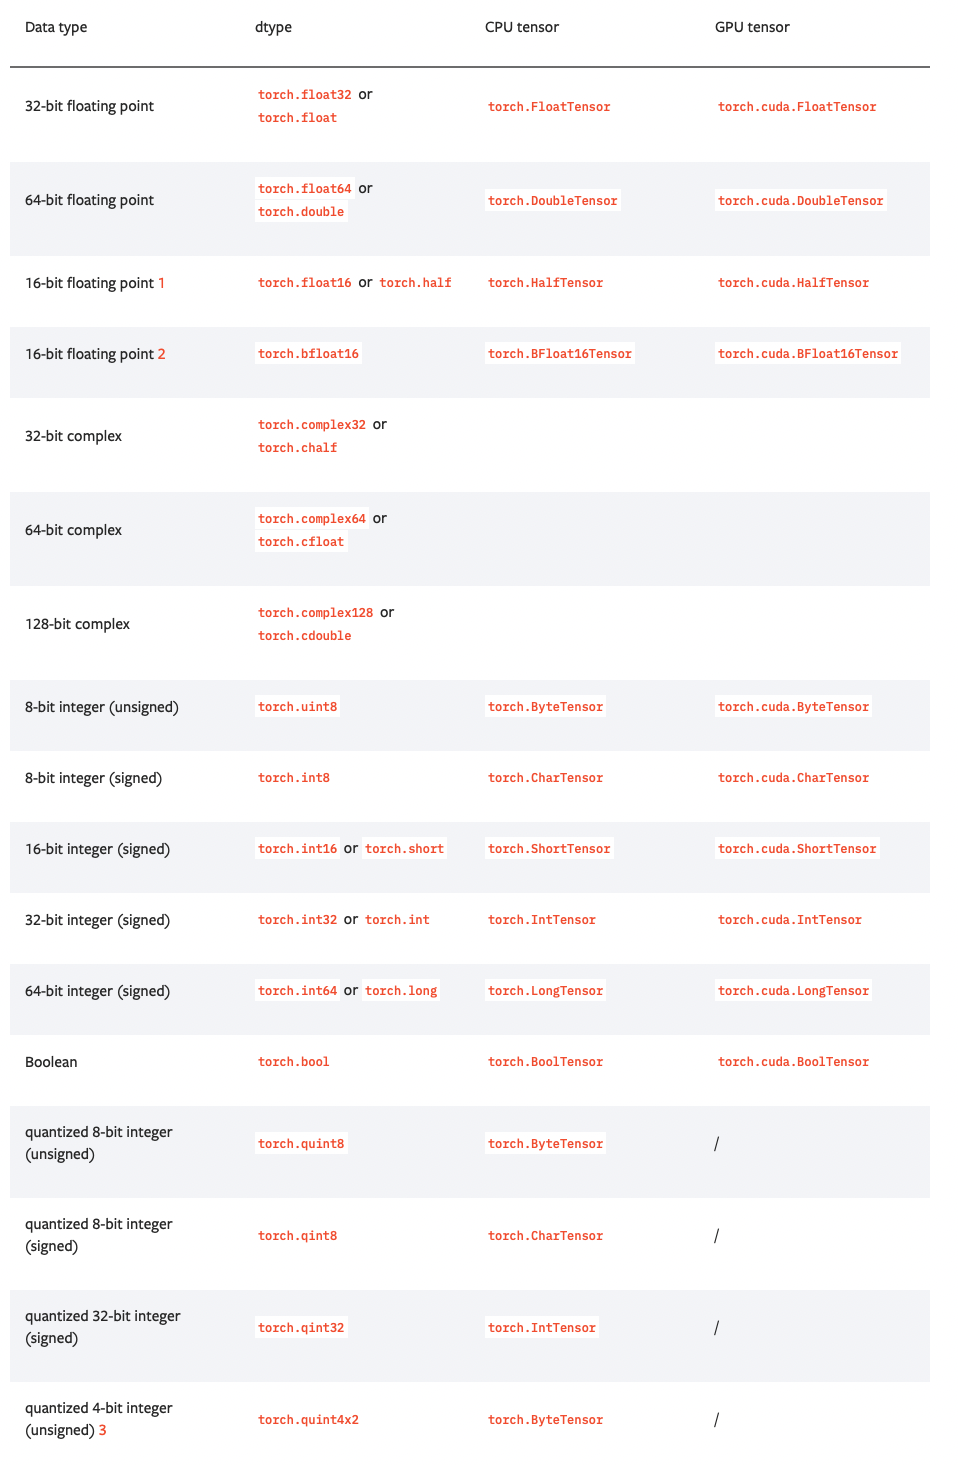

### 3. TORCH.NN

These are the basic building blocks for graphs:

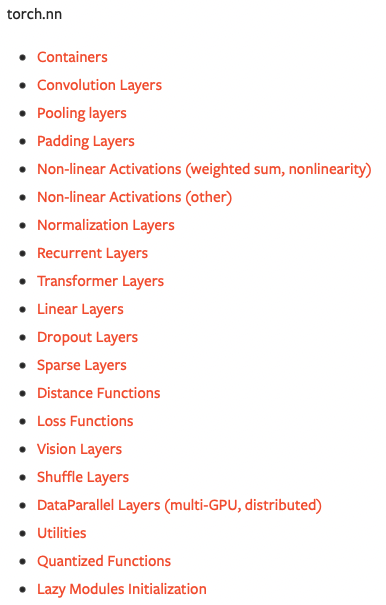

#### 3.1 CLASS torch.nn.Module

Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in a tree structure. You can assign the submodules as regular attributes:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))

#### 3.1.1 apply

Applies fn recursively to every submodule (as returned by .children()) as well as self. Typical use includes initializing the parameters of a model (see also torch.nn.init).

In [ ]:
import torch.nn as nn
@torch.no_grad()
def init_weights(m):
    print(m)
    if type(m) == nn.Linear:
        m.weight.fill_(5.0)
        print(m.weight)
net = nn.Sequential(nn.Linear(2, 2), nn.Linear(2, 2))
net.apply(init_weights)

Linear(in_features=2, out_features=2, bias=True)
Parameter containing:
tensor([[5., 5.],
        [5., 5.]], requires_grad=True)
Linear(in_features=2, out_features=2, bias=True)
Parameter containing:
tensor([[5., 5.],
        [5., 5.]], requires_grad=True)
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)


Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)

#### 3.1.2 eval()

Sets the module in evaluation mode.

This has any effect only on certain modules. See documentations of particular modules for details of their behaviors in training/evaluation mode, if they are affected, e.g. Dropout, BatchNorm, etc.

This is equivalent with self.train(False).

See Locally disabling gradient computation for a comparison between .eval() and several similar mechanisms that may be confused with it.

#### 3.1.3 load_state_dict(state_dict, strict=True)

Copies parameters and buffers from state_dict into this module and its descendants. If strict is True, then the keys of state_dict must exactly match the keys returned by this module’s state_dict() function.

Parameters

state_dict (dict) – a dict containing parameters and persistent buffers.
strict (bool, optional) – whether to strictly enforce that the keys in state_dict match the keys returned by this module’s state_dict() function. Default: True

#### 3.1.4 forward(*input)


#### 3.1.5 to

In [ ]:
linear = nn.Linear(2,2)
linear.weight

Parameter containing:
tensor([[ 0.3996,  0.4689],
        [ 0.5396, -0.0887]], requires_grad=True)

In [ ]:
linear.to(torch.double)

Linear(in_features=2, out_features=2, bias=True)

In [ ]:
linear.weight

Parameter containing:
tensor([[ 0.3996,  0.4689],
        [ 0.5396, -0.0887]], dtype=torch.float64, requires_grad=True)

In [ ]:
gpu1 = torch.device('cuda')

In [ ]:
linear.to(gpu1, dtype=torch.half, non_blocking=True)

Linear(in_features=2, out_features=2, bias=True)

In [ ]:
cpu = torch.device('cpu')
linear.to(cpu)

Linear(in_features=2, out_features=2, bias=True)

In [ ]:
linear.weight

Parameter containing:
tensor([[ 0.3997,  0.4688],
        [ 0.5396, -0.0887]], dtype=torch.float16, requires_grad=True)

In [ ]:
linear = nn.Linear(2,2, bias=None).to(torch.cdouble)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:916: UserWarning: Complex modules are a new feature under active development whose design may change, and some modules might not work as expected when using complex tensors as parameters or buffers. Please file an issue at https://github.com/pytorch/pytorch/issues/new?template=bug-report.yml if a complex module does not work as expected.
  "Complex modules are a new feature under active development whose design may change, "


In [ ]:
linear.weight

Parameter containing:
tensor([[ 0.2810+0.j, -0.0573+0.j],
        [-0.4602+0.j, -0.6913+0.j]], dtype=torch.complex128,
       requires_grad=True)

In [ ]:
linear(torch.ones(3, 2, dtype=torch.cdouble))

tensor([[ 0.2238+0.j, -1.1514+0.j],
        [ 0.2238+0.j, -1.1514+0.j],
        [ 0.2238+0.j, -1.1514+0.j]], dtype=torch.complex128,
       grad_fn=<MmBackward0>)

#### 3.1.6 train(dst_type)

Sets the module in training mode.

This has any effect only on certain modules. See documentations of particular modules for details of their behaviors in training/evaluation mode, if they are affected, e.g. Dropout, BatchNorm, etc.

In [ ]:
def train(self: T, mode: bool = True) -> T:
        r"""Sets the module in training mode.

        This has any effect only on certain modules. See documentations of
        particular modules for details of their behaviors in training/evaluation
        mode, if they are affected, e.g. :class:`Dropout`, :class:`BatchNorm`,
        etc.

        Args:
            mode (bool): whether to set training mode (``True``) or evaluation
                         mode (``False``). Default: ``True``.

        Returns:
            Module: self
        """
        if not isinstance(mode, bool):
            raise ValueError("training mode is expected to be boolean")
        self.training = mode
        for module in self.children():
            module.train(mode)
        return self


#### 3.1.7 eval(dst_type)

In [ ]:
def eval(self: T) -> T:
        r"""Sets the module in evaluation mode.

        This has any effect only on certain modules. See documentations of
        particular modules for details of their behaviors in training/evaluation
        mode, if they are affected, e.g. :class:`Dropout`, :class:`BatchNorm`,
        etc.

        This is equivalent with :meth:`self.train(False) <torch.nn.Module.train>`.

        See :ref:`locally-disable-grad-doc` for a comparison between
        `.eval()` and several similar mechanisms that may be confused with it.

        Returns:
            Module: self
        """
        return self.train(False)

#### 3.1.8 zero_grad(set_to_none=False)

In [ ]:
def zero_grad(self, set_to_none: bool = False) -> None:
        r"""Sets gradients of all model parameters to zero. See similar function
        under :class:`torch.optim.Optimizer` for more context.

        Args:
            set_to_none (bool): instead of setting to zero, set the grads to None.
                See :meth:`torch.optim.Optimizer.zero_grad` for details.
        """
        if getattr(self, '_is_replica', False):
            warnings.warn(
                "Calling .zero_grad() from a module created with nn.DataParallel() has no effect. "
                "The parameters are copied (in a differentiable manner) from the original module. "
                "This means they are not leaf nodes in autograd and so don't accumulate gradients. "
                "If you need gradients in your forward method, consider using autograd.grad instead.")

        for p in self.parameters():
            if p.grad is not None:
                if set_to_none:
                    p.grad = None
                else:
                    if p.grad.grad_fn is not None:
                        p.grad.detach_()
                    else:
                        p.grad.requires_grad_(False)
                    p.grad.zero_()

## 4. TORCH.NN.FUNCTIONAL

SOURCE CODE FOR TORCH.NN.FUNCTIONAL: https://pytorch.org/docs/stable/_modules/torch/nn/functional.html#layer_norm

### 4.1 Convolution functions

Applies a 1D convolution over an input signal composed of several input planes.

This operator supports TensorFloat32.

See Conv1d for details and output shape.

In [ ]:
# torch.nn.functional.conv1d(input, weight, bias=None, stride=1, padding=0, dilation=1, groups=1) → Tensor
inputs = torch.randn(33, 16, 30)
filters = torch.randn(20, 16, 5)
F.conv1d(inputs, filters)

### 4.2 Non-linear activation functions

#### 4.2.1 softmax 


```
def softmax(input: Tensor, dim: Optional[int] = None, _stacklevel: int = 3, dtype: Optional[DType] = None) -> Tensor:
    r"""Applies a softmax function.

    Softmax is defined as:

    :math:`\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}`

    It is applied to all slices along dim, and will re-scale them so that the elements
    lie in the range `[0, 1]` and sum to 1.

    See :class:`~torch.nn.Softmax` for more details.

    Args:
        input (Tensor): input
        dim (int): A dimension along which softmax will be computed.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
          If specified, the input tensor is casted to :attr:`dtype` before the operation
          is performed. This is useful for preventing data type overflows. Default: None.

    .. note::
        This function doesn't work directly with NLLLoss,
        which expects the Log to be computed between the Softmax and itself.
        Use log_softmax instead (it's faster and has better numerical properties).

    """
    if has_torch_function_unary(input):
        return handle_torch_function(softmax, (input,), input, dim=dim, _stacklevel=_stacklevel, dtype=dtype)
    if dim is None:
        dim = _get_softmax_dim("softmax", input.dim(), _stacklevel)
    if dtype is None:
        ret = input.softmax(dim)
    else:
        ret = input.softmax(dim, dtype=dtype)
    return ret
```



#### 4.2.2 Sigmoid



```
def sigmoid(input):
    r"""sigmoid(input) -> Tensor

    Applies the element-wise function :math:`\text{Sigmoid}(x) = \frac{1}{1 + \exp(-x)}`

    See :class:`~torch.nn.Sigmoid` for more details.
    """
    warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
    return input.sigmoid()
```



#### 4.2.3 batch_norm


```
def batch_norm(
    input: Tensor,
    running_mean: Optional[Tensor],
    running_var: Optional[Tensor],
    weight: Optional[Tensor] = None,
    bias: Optional[Tensor] = None,
    training: bool = False,
    momentum: float = 0.1,
    eps: float = 1e-5,
) -> Tensor:
    r"""Applies Batch Normalization for each channel across a batch of data.

    See :class:`~torch.nn.BatchNorm1d`, :class:`~torch.nn.BatchNorm2d`,
    :class:`~torch.nn.BatchNorm3d` for details.
    """
    if has_torch_function_variadic(input, running_mean, running_var, weight, bias):
        return handle_torch_function(
            batch_norm,
            (input, running_mean, running_var, weight, bias),
            input,
            running_mean,
            running_var,
            weight=weight,
            bias=bias,
            training=training,
            momentum=momentum,
            eps=eps,
        )
    if training:
        _verify_batch_size(input.size())

    return torch.batch_norm(
        input, weight, bias, running_mean, running_var, training, momentum, eps, torch.backends.cudnn.enabled
    )
```



#### 4.2.4 layer_norm



```
def layer_norm(
    input: Tensor,
    normalized_shape: List[int],
    weight: Optional[Tensor] = None,
    bias: Optional[Tensor] = None,
    eps: float = 1e-5,
) -> Tensor:
    r"""Applies Layer Normalization for last certain number of dimensions.

    See :class:`~torch.nn.LayerNorm` for details.
    """
    if has_torch_function_variadic(input, weight, bias):
        return handle_torch_function(
            layer_norm, (input, weight, bias), input, normalized_shape, weight=weight, bias=bias, eps=eps
        )
    return torch.layer_norm(input, normalized_shape, weight, bias, eps, torch.backends.cudnn.enabled)
```



### 4.3 Linear Functions 

Applies a linear transformation to the incoming data: 
y
=
x
A
T
+
b
y=xA 
T
 +b.

This operator supports TensorFloat32.

In [ ]:
# torch.nn.functional.linear(input, weight, bias=None) → Tensor

### 4.4 Dropout Functions

During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution.



```
def dropout(input: Tensor, p: float = 0.5, training: bool = True, inplace: bool = False) -> Tensor:
    r"""
    During training, randomly zeroes some of the elements of the input
    tensor with probability :attr:`p` using samples from a Bernoulli
    distribution.

    See :class:`~torch.nn.Dropout` for details.

    Args:
        p: probability of an element to be zeroed. Default: 0.5
        training: apply dropout if is ``True``. Default: ``True``
        inplace: If set to ``True``, will do this operation in-place. Default: ``False``
    """
    if has_torch_function_unary(input):
        return handle_torch_function(dropout, (input,), input, p=p, training=training, inplace=inplace)
    if p < 0.0 or p > 1.0:
        raise ValueError("dropout probability has to be between 0 and 1, " "but got {}".format(p))
    return _VF.dropout_(input, p, training) if inplace else _VF.dropout(input, p, training)

```



### 4.5 Loss functions

#### 4.5.1 BINARY_CROSS_ENTROPY



```
def binary_cross_entropy(
    input: Tensor,
    target: Tensor,
    weight: Optional[Tensor] = None,
    size_average: Optional[bool] = None,
    reduce: Optional[bool] = None,
    reduction: str = "mean",
) -> Tensor:
    r"""Function that measures the Binary Cross Entropy between the target and input
    probabilities.

    See :class:`~torch.nn.BCELoss` for details.

    Args:
        input: Tensor of arbitrary shape as probabilities.
        target: Tensor of the same shape as input with values between 0 and 1.
        weight (Tensor, optional): a manual rescaling weight
                if provided it's repeated to match input tensor shape
        size_average (bool, optional): Deprecated (see :attr:`reduction`). By default,
            the losses are averaged over each loss element in the batch. Note that for
            some losses, there multiple elements per sample. If the field :attr:`size_average`
            is set to ``False``, the losses are instead summed for each minibatch. Ignored
            when reduce is ``False``. Default: ``True``
        reduce (bool, optional): Deprecated (see :attr:`reduction`). By default, the
            losses are averaged or summed over observations for each minibatch depending
            on :attr:`size_average`. When :attr:`reduce` is ``False``, returns a loss per
            batch element instead and ignores :attr:`size_average`. Default: ``True``
        reduction (string, optional): Specifies the reduction to apply to the output:
            ``'none'`` | ``'mean'`` | ``'sum'``. ``'none'``: no reduction will be applied,
            ``'mean'``: the sum of the output will be divided by the number of
            elements in the output, ``'sum'``: the output will be summed. Note: :attr:`size_average`
            and :attr:`reduce` are in the process of being deprecated, and in the meantime,
            specifying either of those two args will override :attr:`reduction`. Default: ``'mean'``

    Examples::

        >>> input = torch.randn(3, 2, requires_grad=True)
        >>> target = torch.rand(3, 2, requires_grad=False)
        >>> loss = F.binary_cross_entropy(torch.sigmoid(input), target)
        >>> loss.backward()
    """
    if has_torch_function_variadic(input, target, weight):
        return handle_torch_function(
            binary_cross_entropy,
            (input, target, weight),
            input,
            target,
            weight=weight,
            size_average=size_average,
            reduce=reduce,
            reduction=reduction,
        )
    if size_average is not None or reduce is not None:
        reduction_enum = _Reduction.legacy_get_enum(size_average, reduce)
    else:
        reduction_enum = _Reduction.get_enum(reduction)
    if target.size() != input.size():
        raise ValueError(
            "Using a target size ({}) that is different to the input size ({}) is deprecated. "
            "Please ensure they have the same size.".format(target.size(), input.size())
        )

    if weight is not None:
        new_size = _infer_size(target.size(), weight.size())
        weight = weight.expand(new_size)

    return torch._C._nn.binary_cross_entropy(input, target, weight, reduction_enum)
```



## 5. Torch.distributed


https://pytorch.org/docs/stable/distributed.html


Backends

torch.distributed supports three built-in backends, each with different capabilities. The table below shows which functions are available for use with CPU / CUDA tensors. MPI supports CUDA only if the implementation used to build PyTorch supports it.

Backends that come with PyTorch

PyTorch distributed package supports Linux (stable), MacOS (stable), and Windows (prototype). By default for Linux, the Gloo and NCCL backends are built and included in PyTorch distributed (NCCL only when building with CUDA). MPI is an optional backend that can only be included if you build PyTorch from source. (e.g. building PyTorch on a host that has MPI installed.)

Which backend to use?

In the past, we were often asked: “which backend should I use?”.

Rule of thumb

--Use the NCCL backend for distributed GPU training
--Use the Gloo backend for distributed CPU training.


GPU hosts with InfiniBand interconnect
--Use NCCL, since it’s the only backend that currently supports InfiniBand and GPUDirect.

GPU hosts with Ethernet interconnect

--Use NCCL, since it currently provides the best distributed GPU training performance, especially for multiprocess single-node or multi-node distributed training. If you encounter any problem with NCCL, use Gloo as the fallback option. (Note that Gloo currently runs slower than NCCL for GPUs.)


CPU hosts with InfiniBand interconnect

--If your InfiniBand has enabled IP over IB, use Gloo, otherwise, use MPI instead. We are planning on adding InfiniBand support for Gloo in the upcoming releases.


CPU hosts with Ethernet interconnect

--Use Gloo, unless you have specific reasons to use MPI.

## 6. TORCH.CUDA

### 6.1 Random Number Generator

#### 6.2 TORCH.CUDA.MANUAL_SEED

Sets the seed for generating random numbers for the current GPU. It’s safe to call this function if CUDA is not available; in that case, it is silently ignored.



```
def manual_seed(seed: int) -> None:
    r"""Sets the seed for generating random numbers for the current GPU.
    It's safe to call this function if CUDA is not available; in that
    case, it is silently ignored.

    Args:
        seed (int): The desired seed.

    .. warning::
        If you are working with a multi-GPU model, this function is insufficient
        to get determinism.  To seed all GPUs, use :func:`manual_seed_all`.
    """
    seed = int(seed)

    def cb():
        idx = current_device()
        default_generator = torch.cuda.default_generators[idx]
        default_generator.manual_seed(seed)

    _lazy_call(cb, seed=True)
```



#### 6.3 TORCH.CUDA.MANUAL_SEED_ALL

Sets the seed for generating random numbers on all GPUs. It’s safe to call this function if CUDA is not available; in that case, it is silently ignored.



```
def manual_seed_all(seed: int) -> None:
    r"""Sets the seed for generating random numbers on all GPUs.
    It's safe to call this function if CUDA is not available; in that
    case, it is silently ignored.

    Args:
        seed (int): The desired seed.
    """
    seed = int(seed)

    def cb():
        for i in range(device_count()):
            default_generator = torch.cuda.default_generators[i]
            default_generator.manual_seed(seed)

    _lazy_call(cb, seed_all=True)
```



## 7. TORCH.ONNX

## 8. TORCH.OPTIM

https://pytorch.org/docs/stable/optim.html

torch.optim is a package implementing various optimization algorithms. Most commonly used methods are already supported, and the interface is general enough, so that more sophisticated ones can be also easily integrated in the future.

To use torch.optim you have to construct an optimizer object, that will hold the current state and will update the parameters based on the computed gradients.

To construct an Optimizer you have to give it an iterable containing the parameters (all should be Variable s) to optimize. Then, you can specify optimizer-specific options such as the learning rate, weight decay, etc.



In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam([var1, var2], lr=0.0001)

In [ ]:
for input, target in dataset:
    optimizer.zero_grad()
    output = model(input)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()

How to adjust learning rate

torch.optim.lr_scheduler provides several methods to adjust the learning rate based on the number of epochs. torch.optim.lr_scheduler.ReduceLROnPlateau allows dynamic learning rate reducing based on some validation measurements.

Learning rate scheduling should be applied after optimizer’s update; e.g., you should write your code this way:

In [ ]:
model = [Parameter(torch.randn(2, 2, requires_grad=True))]
optimizer = SGD(model, 0.1)
scheduler = ExponentialLR(optimizer, gamma=0.9)

for epoch in range(20):
    for input, target in dataset:
        optimizer.zero_grad()
        output = model(input)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
    scheduler.step()

In [ ]:
"""
Most learning rate schedulers can be called back-to-back (also referred to as chaining schedulers). 
The result is that each scheduler is applied one after the other on the learning rate obtained by the one preceding it.
"""

model = [Parameter(torch.randn(2, 2, requires_grad=True))]
optimizer = SGD(model, 0.1)
scheduler1 = ExponentialLR(optimizer, gamma=0.9)
scheduler2 = MultiStepLR(optimizer, milestones=[30,80], gamma=0.1)

for epoch in range(20):
    for input, target in dataset:
        optimizer.zero_grad()
        output = model(input)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
    scheduler1.step()
    scheduler2.step()

## 9. TORCH.UTILS.DATA

https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

At the heart of PyTorch data loading utility is the torch.utils.data.DataLoader class. It represents a Python iterable over a dataset, with support for

-- map-style and iterable-style datasets,

-- customizing data loading order,

-- automatic batching,

-- single- and multi-process data loading,

-- automatic memory pinning

### 9.1 torch.utils.data.Dataset(*args, **kwds)

An abstract class representing a Dataset.

All datasets that represent a map from keys to data samples should subclass it. All subclasses should overwrite __getitem__(), supporting fetching a data sample for a given key. Subclasses could also optionally overwrite __len__(), which is expected to return the size of the dataset by many Sampler implementations and the default options of DataLoader.

In [ ]:
class Dataset(Generic[T_co]):
    r"""An abstract class representing a :class:`Dataset`.

    All datasets that represent a map from keys to data samples should subclass
    it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
    data sample for a given key. Subclasses could also optionally overwrite
    :meth:`__len__`, which is expected to return the size of the dataset by many
    :class:`~torch.utils.data.Sampler` implementations and the default options
    of :class:`~torch.utils.data.DataLoader`.

    .. note::
      :class:`~torch.utils.data.DataLoader` by default constructs a index
      sampler that yields integral indices.  To make it work with a map-style
      dataset with non-integral indices/keys, a custom sampler must be provided.
    """

    def __getitem__(self, index) -> T_co:
        raise NotImplementedError

    def __add__(self, other: 'Dataset[T_co]') -> 'ConcatDataset[T_co]':
        return ConcatDataset([self, other])


    # No `def __len__(self)` default?
    # See NOTE [ Lack of Default `__len__` in Python Abstract Base Classes ]
    # in pytorch/torch/utils/data/sampler.py

An iterable Dataset.

All datasets that represent an iterable of data samples should subclass it. Such form of datasets is particularly useful when data come from a stream.

All subclasses should overwrite __iter__(), which would return an iterator of samples in this dataset.

When a subclass is used with DataLoader, each item in the dataset will be yielded from the DataLoader iterator. When num_workers > 0, each worker process will have a different copy of the dataset object, so it is often desired to configure each copy independently to avoid having duplicate data returned from the workers. get_worker_info(), when called in a worker process, returns information about the worker. It can be used in either the dataset’s __iter__() method or the DataLoader ‘s worker_init_fn option to modify each copy’s behavior.

Example 1: splitting workload across all workers in __iter__():

In [ ]:
# --> torch.utils.data.IterableDataset(*args, **kwds)
class IterableDataset(Dataset[T_co]):
    r"""An iterable Dataset.

    All datasets that represent an iterable of data samples should subclass it.
    Such form of datasets is particularly useful when data come from a stream.

    All subclasses should overwrite :meth:`__iter__`, which would return an
    iterator of samples in this dataset.

    When a subclass is used with :class:`~torch.utils.data.DataLoader`, each
    item in the dataset will be yielded from the :class:`~torch.utils.data.DataLoader`
    iterator. When :attr:`num_workers > 0`, each worker process will have a
    different copy of the dataset object, so it is often desired to configure
    each copy independently to avoid having duplicate data returned from the
    workers. :func:`~torch.utils.data.get_worker_info`, when called in a worker
    process, returns information about the worker. It can be used in either the
    dataset's :meth:`__iter__` method or the :class:`~torch.utils.data.DataLoader` 's
    :attr:`worker_init_fn` option to modify each copy's behavior.

    Example 1: splitting workload across all workers in :meth:`__iter__`::

        >>> class MyIterableDataset(torch.utils.data.IterableDataset):
        ...     def __init__(self, start, end):
        ...         super(MyIterableDataset).__init__()
        ...         assert end > start, "this example code only works with end >= start"
        ...         self.start = start
        ...         self.end = end
        ...
        ...     def __iter__(self):
        ...         worker_info = torch.utils.data.get_worker_info()
        ...         if worker_info is None:  # single-process data loading, return the full iterator
        ...             iter_start = self.start
        ...             iter_end = self.end
        ...         else:  # in a worker process
        ...             # split workload
        ...             per_worker = int(math.ceil((self.end - self.start) / float(worker_info.num_workers)))
        ...             worker_id = worker_info.id
        ...             iter_start = self.start + worker_id * per_worker
        ...             iter_end = min(iter_start + per_worker, self.end)
        ...         return iter(range(iter_start, iter_end))
        ...
        >>> # should give same set of data as range(3, 7), i.e., [3, 4, 5, 6].
        >>> ds = MyIterableDataset(start=3, end=7)

        >>> # Single-process loading
        >>> print(list(torch.utils.data.DataLoader(ds, num_workers=0)))
        [3, 4, 5, 6]

        >>> # Mult-process loading with two worker processes
        >>> # Worker 0 fetched [3, 4].  Worker 1 fetched [5, 6].
        >>> print(list(torch.utils.data.DataLoader(ds, num_workers=2)))
        [3, 5, 4, 6]

        >>> # With even more workers
        >>> print(list(torch.utils.data.DataLoader(ds, num_workers=20)))
        [3, 4, 5, 6]

    Example 2: splitting workload across all workers using :attr:`worker_init_fn`::

        >>> class MyIterableDataset(torch.utils.data.IterableDataset):
        ...     def __init__(self, start, end):
        ...         super(MyIterableDataset).__init__()
        ...         assert end > start, "this example code only works with end >= start"
        ...         self.start = start
        ...         self.end = end
        ...
        ...     def __iter__(self):
        ...         return iter(range(self.start, self.end))
        ...
        >>> # should give same set of data as range(3, 7), i.e., [3, 4, 5, 6].
        >>> ds = MyIterableDataset(start=3, end=7)

        >>> # Single-process loading
        >>> print(list(torch.utils.data.DataLoader(ds, num_workers=0)))
        [3, 4, 5, 6]
        >>>
        >>> # Directly doing multi-process loading yields duplicate data
        >>> print(list(torch.utils.data.DataLoader(ds, num_workers=2)))
        [3, 3, 4, 4, 5, 5, 6, 6]

        >>> # Define a `worker_init_fn` that configures each dataset copy differently
        >>> def worker_init_fn(worker_id):
        ...     worker_info = torch.utils.data.get_worker_info()
        ...     dataset = worker_info.dataset  # the dataset copy in this worker process
        ...     overall_start = dataset.start
        ...     overall_end = dataset.end
        ...     # configure the dataset to only process the split workload
        ...     per_worker = int(math.ceil((overall_end - overall_start) / float(worker_info.num_workers)))
        ...     worker_id = worker_info.id
        ...     dataset.start = overall_start + worker_id * per_worker
        ...     dataset.end = min(dataset.start + per_worker, overall_end)
        ...

        >>> # Mult-process loading with the custom `worker_init_fn`
        >>> # Worker 0 fetched [3, 4].  Worker 1 fetched [5, 6].
        >>> print(list(torch.utils.data.DataLoader(ds, num_workers=2, worker_init_fn=worker_init_fn)))
        [3, 5, 4, 6]

        >>> # With even more workers
        >>> print(list(torch.utils.data.DataLoader(ds, num_workers=20, worker_init_fn=worker_init_fn)))
        [3, 4, 5, 6]
    """
    def __iter__(self) -> Iterator[T_co]:
        raise NotImplementedError

    def __add__(self, other: Dataset[T_co]):
        return ChainDataset([self, other])


    # No `def __len__(self)` default? Subclasses raise `TypeError` when needed.
    # See NOTE [ Lack of Default `__len__` in Python Abstract Base Classes ]

### 9.2 Data Loading Order and Sampler

For iterable-style datasets, data loading order is entirely controlled by the user-defined iterable. This allows easier implementations of chunk-reading and dynamic batch size (e.g., by yielding a batched sample at each time).

The rest of this section concerns the case with map-style datasets. torch.utils.data.Sampler classes are used to specify the sequence of indices/keys used in data loading. They represent iterable objects over the indices to datasets. E.g., in the common case with stochastic gradient decent (SGD), a Sampler could randomly permute a list of indices and yield each one at a time, or yield a small number of them for mini-batch SGD.

A sequential or shuffled sampler will be automatically constructed based on the shuffle argument to a DataLoader. Alternatively, users may use the sampler argument to specify a custom Sampler object that at each time yields the next index/key to fetch.

A custom Sampler that yields a list of batch indices at a time can be passed as the batch_sampler argument. Automatic batching can also be enabled via batch_size and drop_last arguments. See the next section for more details on this.

### 9.3 Loading Batched and Non-Batched Data

DataLoader supports automatically collating individual fetched data samples into batches via arguments batch_size, drop_last, batch_sampler, and collate_fn (which has a default function).

Automatic batching (default)

This is the most common case, and corresponds to fetching a minibatch of data and collating them into batched samples, i.e., containing Tensors with one dimension being the batch dimension (usually the first).

When batch_size (default 1) is not None, the data loader yields batched samples instead of individual samples. batch_size and drop_last arguments are used to specify how the data loader obtains batches of dataset keys. For map-style datasets, users can alternatively specify batch_sampler, which yields a list of keys at a time.

# PyTorch Libraries

## 1. torchtext

https://pytorch.org/text/stable/

This library is part of the PyTorch project. PyTorch is an open source machine learning framework.

Features described in this documentation are classified by release status:

Stable: These features will be maintained long-term and there should generally be no major performance limitations or gaps in documentation. We also expect to maintain backwards compatibility (although breaking changes can happen and notice will be given one release ahead of time).

Beta: Features are tagged as Beta because the API may change based on user feedback, because the performance needs to improve, or because coverage across operators is not yet complete. For Beta features, we are committing to seeing the feature through to the Stable classification. We are not, however, committing to backwards compatibility.

Prototype: These features are typically not available as part of binary distributions like PyPI or Conda, except sometimes behind run-time flags, and are at an early stage for feedback and testing.

The torchtext package consists of data processing utilities and popular datasets for natural language.